In [ ]:
# install & import our packages
# !pip install -U selenium
import os
import json 
import requests
# import selenium
# from selenium import webdriver 
# DRIVER_PATH = '/content/chromedriver'
# from selenium.webdriver.chrome.service import Service
import base64
import time
import urllib.request
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
# from selenium.common import exceptions


In [ ]:
# --- INSTALL ALL THE PACAKGES WE NEED HERE 
!pip install selenium
!pip install yfinance
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
# -- COPY THE INSTALLED VERSION 
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
# --- IMPORT THE SELENIUM LIBRARY 
from selenium import webdriver
# --- SET UP CHROME OPTIONS
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
# --- SET UP THE WEB DRIVER
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
# we simply hard coded the days into the URL
day = '03'
month = '11'
year = '2021'
hour = '00'
BASE_LINK = "https://www.prnewswire.com/news-releases/news-releases-list/?&pagesize=25&month="+month+"&day="+day+"&year="+year+"&hour="+hour+"&page="

# define start page number
page = 1

news_df = pd.DataFrame(columns= ['news_text', 'title', 'date', 'author'])

while page <=10: 

    # get the page details
    driver.get(BASE_LINK + str(page))

    # wait a lil bit till the page loads completely
    time.sleep(3)

    # -- COMMENTED CODE BELOW IS FOR ACTUALLY CLICKING ON THE BUTTONS BUT WE DON'T NEED THAT ANY MORE

    # # get the datepicker element
    date_picker= driver.find_element_by_css_selector('input#date')

    # #  change date to 2 weeks from today; today is the 17th so 2 weeks ago is the 03/11/2021, no need to over complicate things
    driver.execute_script("arguments[0].value = arguments[1]",date_picker, "03/11/2021")

    # # get the time picker element
    # time_picker = driver.find_element_by_css_selector('span#filter-option')

    # # change the value of the time picker to 03:00
    # driver.execute_script('arguments[0].innerHTML = arguments[1]', time_picker, "03:00")

    # # now click on the go button to generate the data
    # driver.find_element_by_css_selector('button#GoButton').click()

    # Get all the news for this page
    news = driver.find_elements_by_css_selector('a.newsreleaseconsolidatelink')
    news_links = []
    # get all the links and store in a seperate array 
    for link in news: 
        news_links.append(link.get_attribute('href'))
    # loop through articles and print them out/ store them in csv file
    for news_link in news_links: 
        # go to the link to the full article
        driver.get(news_link); 
        # wait for a few seconds for the page to load
        time.sleep(2)

        # get the author, title, date and full tet
        author = driver.find_element_by_xpath("//meta[@name='author']").get_attribute("content")
        title = driver.title
        date = driver.find_element_by_xpath("//meta[@name='date']").get_attribute("content")

        # then scrape everything from this page
        full_text = driver.find_elements_by_tag_name('p')
        
        news_df = news_df.append({
            'title':title,
            'date':date,
            'author': author,
            'news_text': ' '.join([str(texts.get_attribute('innerHTML')) for texts in full_text])
        }, ignore_index=True)
        pprint(news_df.news_text)
    # Change page number
    page += 1
# close driver
driver.close

news_df.to_csv('company_news.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead


0    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
2    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
2    Searching for your content... \nIn-Language Ne...
3    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for your content... \nIn-Language Ne...
1    Searching for your content... \nIn-Language Ne...
2    Searching for your content... \nIn-Language Ne...
3    Searching for your content... \nIn-Language Ne...
4    Searching for your content... \nIn-Language Ne...
Name: news_text, dtype: object
0    Searching for y

In [ ]:
import re 

In [ ]:
#code for getting the stock data for HESKA Corporation(Took randomly) ----- Still we did not finalise the 2 stock symbols I just tried with the Random stock of a company..
#Once we fix the Stock symbol we can get the required stock data. 
import yfinance as yf 
  
hska = yf.Ticker("HSKA")

# get stock info
print(hska.info)

# get historical market data
hist = hska.history(period="1mo")

{'zip': '80538', 'sector': 'Healthcare', 'fullTimeEmployees': 602, 'longBusinessSummary': 'Heska Corporation manufactures, sells, and markets veterinary diagnostic and specialty products for canine and feline healthcare markets in the United States, Canada, Mexico, Australia, France, Germany, Italy, Malaysia, Spain, and Switzerland. The company offers Element DC and Element DC5x veterinary chemistry analyzers for blood chemistry and electrolyte analysis; Element HT5 and scil Vet abc Plus +TM veterinary hematology analyzers to measure blood cell and platelet count, and hemoglobin levels; Element POC blood gas and electrolyte analyzers; Element i immunodiagnostic analyzers; Element COAG veterinary analyzers; and IV infusion pumps. It also provides digital radiography hardware and mobile digital radiography products, as well as ultrasound systems; Cloudbank, a Web-based image storage solution; HeskaView, a picture archival and communications system for Cloudbank; point-of-care heartworm d

In [ ]:
 #Importing the data values into the dataframe
HSKA_Stock = pd.DataFrame(hist)
HSKA_Stock 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-08,191.490005,199.350006,190.210007,195.020004,111300,0,0
2021-11-09,196.309998,196.309998,187.490005,188.580002,88000,0,0
2021-11-10,188.710007,190.119995,182.240005,184.050003,112500,0,0
2021-11-11,183.660004,186.539993,179.649994,179.649994,32500,0,0
2021-11-12,179.770004,183.460007,177.380005,182.380005,32300,0,0
2021-11-15,182.149994,182.149994,173.190002,174.970001,61800,0,0
2021-11-16,177.210007,181.320007,175.139999,181.100006,88100,0,0
2021-11-17,179.660004,181.919998,178.029999,180.979996,64200,0,0
2021-11-18,178.789993,180.089996,175.759995,178.850006,56700,0,0


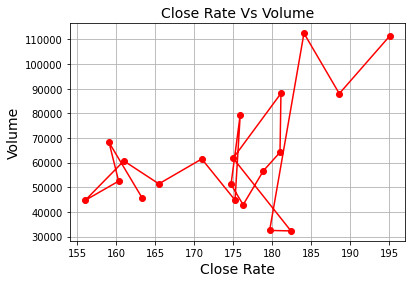

In [ ]:
#visualization of the Volume against close value --- Simple visualization part
plt.plot(HSKA_Stock['Close'], HSKA_Stock['Volume'], color='red', marker='o')
plt.title('Close Rate Vs Volume', fontsize=14)
plt.xlabel('Close Rate', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


                  Open        High         Low  ...  Volume  Dividends  Stock Splits
Date                                            ...                                 
2021-11-08  191.490005  199.350006  190.210007  ...  111300          0             0
2021-11-09  196.309998  196.309998  187.490005  ...   88000          0             0
2021-11-10  188.710007  190.119995  182.240005  ...  112500          0             0
2021-11-11  183.660004  186.539993  179.649994  ...   32500          0             0
2021-11-12  179.770004  183.460007  177.380005  ...   32300          0             0

[5 rows x 7 columns]


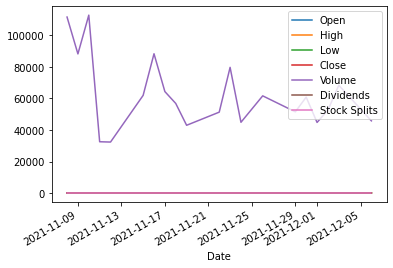

In [ ]:

# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = HSKA_Stock
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [ ]:
#Stock Price Trend forcasting.
y = HSKA_Stock['Close']                            #Assigning y vairable = close price. 
x = HSKA_Stock[['Open', 'High', 'Low', 'Volume']]  #Assigning x variable to stock features; Open, High, Low, Volume. 